<h1> Food Delivery Prediction

In [49]:
#Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [50]:
print('The number of data points',len(set(data.ID)))
print('The number of features in the data set',data.shape[1])

The number of data points 45593
The number of features in the data set 20


<h2> Data Cleaning

In [51]:
#Checking the null values
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

There are no null values. But the null values are in the string format of 'Nan'. These values can be removed using logical conditions.

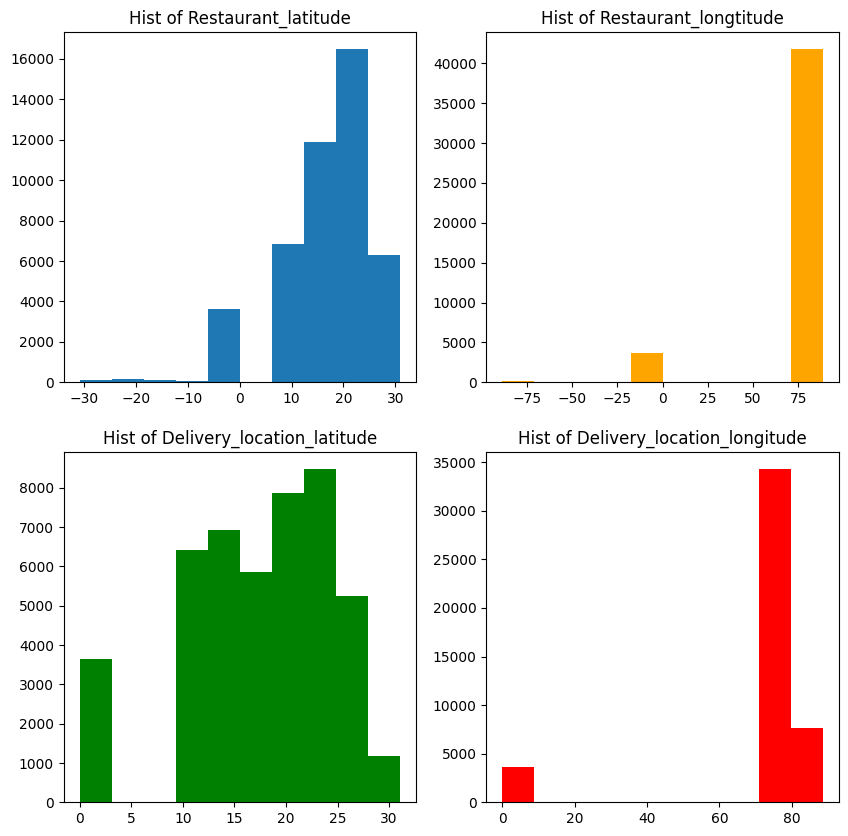

In [52]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0, 0].hist(data.Restaurant_latitude)
axs[0, 0].set_title('Hist of Restaurant_latitude')
axs[0, 1].hist(data.Restaurant_longitude, color = 'orange')
axs[0, 1].set_title('Hist of Restaurant_longtitude')
axs[1, 0].hist(data.Delivery_location_latitude, color = 'green')
axs[1, 0].set_title('Hist of Delivery_location_latitude')
axs[1, 1].hist(data.Delivery_location_longitude, color = 'red')
axs[1, 1].set_title('Hist of Delivery_location_longitude')
plt.show()

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

##### Observation : The data is related to the Indian geography. The latitude and longitude of zero is incorrect. Removing the zeros from the dataset. Latitude of negative values were wrong. These are converted to positive values.

In [53]:
# The latitude and longitude can not be zero
data = data[(data['Restaurant_latitude'] != 0.0)]
# As the latitude do not have negative values. Converting all the values to positive values
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()
print('The shape of the new data set with {0} row and {1} columns'.format(data.shape[0],data.shape[1]))

The shape of the new data set with 41953 row and 20 columns


<ipython-input-53-9218deac55aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()


In [54]:
#the NaN values in the Delivery person age, delivery person rating are removed
# The latitude and longitude can not be zero
data = data[(data['Delivery_person_Age'] != 'NaN ') 
            & (data['Restaurant_latitude'] != 0.0) 
            & (data['Delivery_person_Ratings'] != 'NaN ')
            & (data['Time_Orderd'] != 'NaN ')]
# As the latitude do not have negative values. Converting all the values to positive values
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()
print('The shape of the new data set with {0} row and {1} columns'.format(data.shape[0],data.shape[1]))

The shape of the new data set with 40109 row and 20 columns


##### Removing the rows where NaN are present in Delivery_person_Age, Delivery person rating and time orderd

In [55]:
data = data[(data['Delivery_person_Age'] != 'NaN ') 
            & (data['Delivery_person_Ratings'] != 'NaN ')
            & (data['Time_Orderd'] != 'NaN ')]

#### Chaning the data types of the columns

In [56]:
# Changing the data type
data.Delivery_person_Age =  data.Delivery_person_Age.astype(int)
data.Delivery_person_Ratings = data.Delivery_person_Ratings.astype(float)
data['Order_Date'] = pd.to_datetime(data['Order_Date'],infer_datetime_format=True)


In [57]:
# The time taken have min string. Split with the deliminator and drop the columns
data[['min','Time_taken']] = data['Time_taken(min)'].str.split(' ',expand=True)
data.drop(['min','Time_taken(min)'], axis =1, inplace=True)
data.Time_taken = data.Time_taken.astype(float)

Festival
NaN       204
No      39122
Yes       783
Name: ID, dtype: int64


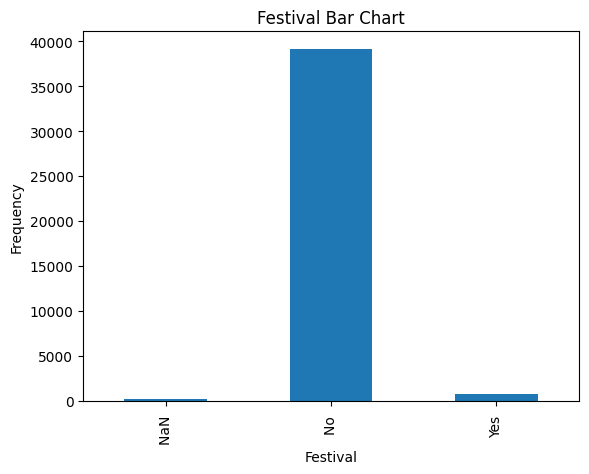

In [58]:
# Count of festivle
print(data.groupby('Festival').ID.count())
data['Festival'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Festival')
plt.ylabel('Frequency')
plt.title('Festival Bar Chart')
plt.show()

##### As the probability of festivals in India is 6.57% (considering 24 holidays 24/365). Replacing the NaN with 'No festival'

In [59]:
# The probability of festivals in India is 6.57% (24/365). Replacing the NaN with 'No'
data.Festival = data.Festival.str.replace('NaN ', 'No ')
data.groupby('Festival').ID.count()

Festival
No      39326
Yes       783
Name: ID, dtype: int64

City
Metropolitian     30030
NaN                1050
Semi-Urban          138
Urban              8891
Name: ID, dtype: int64


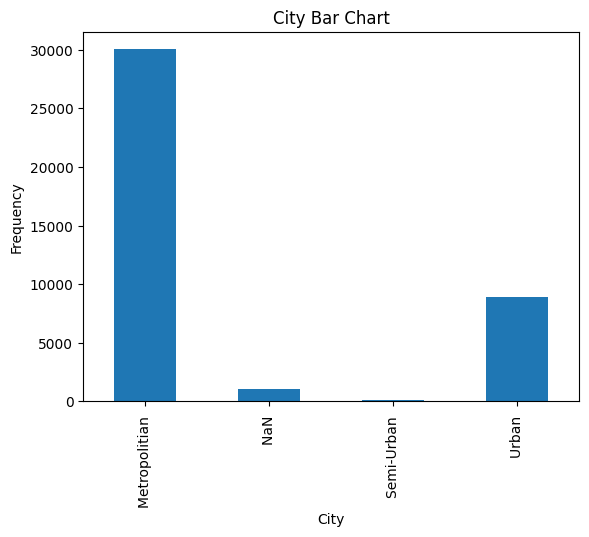

In [60]:
# Count of city type
print(data.groupby('City').ID.count())
data['City'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('City Bar Chart')
plt.show()

##### Replacing the Nan with most frequent Metropolitian

In [61]:
# Replacing the NaN city with the most frequent Metropolitian 
data.City = data.City.str.replace('NaN ', 'Metropolitian ')
data.groupby('City').ID.count()

City
Metropolitian     31080
Semi-Urban          138
Urban              8891
Name: ID, dtype: int64

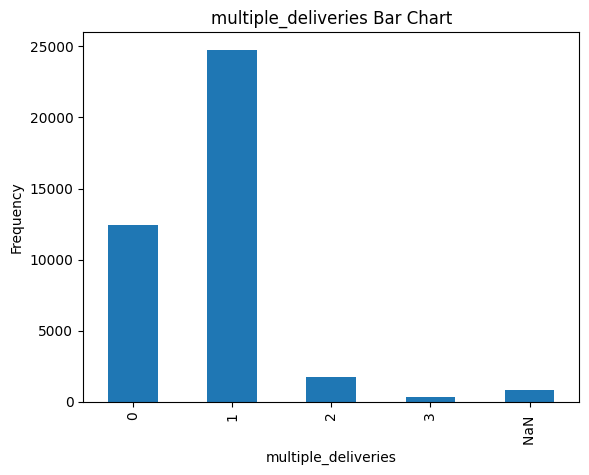

In [62]:
data.groupby('multiple_deliveries').ID.count()
data['multiple_deliveries'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('multiple_deliveries')
plt.ylabel('Frequency')
plt.title('multiple_deliveries Bar Chart')
plt.show()

In [63]:
data.multiple_deliveries = data.multiple_deliveries.astype('str')
data.multiple_deliveries = data.multiple_deliveries.str.replace('NaN ', '1')
data.groupby('multiple_deliveries').ID.count()

multiple_deliveries
0    12428
1    25600
2     1772
3      309
Name: ID, dtype: int64

Weatherconditions
Cloudy        6693
Fog           6805
Sandstorms    6676
Stormy        6773
Sunny         6524
Windy         6638
Name: ID, dtype: int64


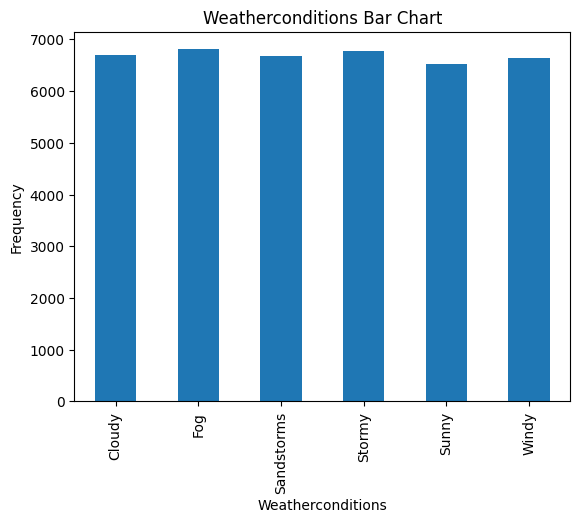

In [64]:
data.groupby('Weatherconditions').ID.count()
data.Weatherconditions = data.Weatherconditions.astype('str')
data.Weatherconditions = data.Weatherconditions.str.replace('conditions ', '')
print(data.groupby('Weatherconditions').ID.count())
data.groupby('Weatherconditions').ID.count()
data['Weatherconditions'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Weatherconditions')
plt.ylabel('Frequency')
plt.title('Weatherconditions Bar Chart')
plt.show()

<h3> Feature Engineering


<h3> 1.Distance Calculation


In [65]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))

    return R * c

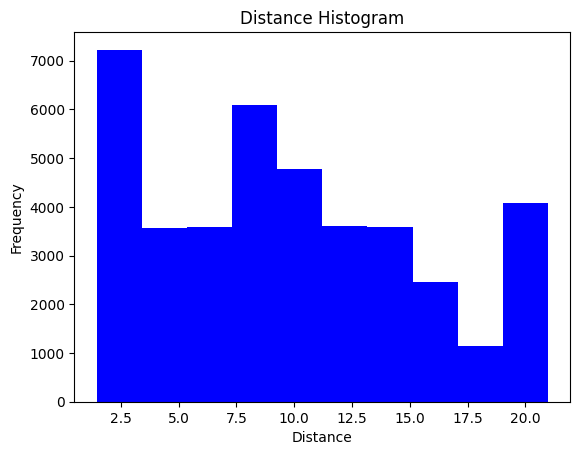

In [66]:
data['Distance'] = haversine(data['Restaurant_latitude'], data['Restaurant_longitude'],data['Delivery_location_latitude'], data['Delivery_location_longitude'])
plt.hist(data.Distance, color = 'blue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()

<h3> 2.Speed Calculation


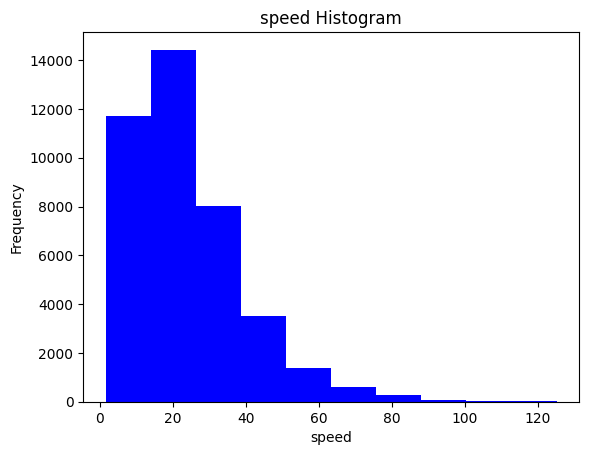

In [67]:
data['speed'] = data['Distance'] * 60.0 / data['Time_taken']
plt.hist(data.speed, color = 'blue')
plt.xlabel('speed')
plt.ylabel('Frequency')
plt.title('speed Histogram')
plt.show()

##### Driving the vehicle above 80km/hr is not realistic in the city traffic. So removing the rows which are greater than 80km\hr


In [68]:
# driving the vehicle above 80km/hr is not realistic to drive in the city traffic. So removing the rows which are greater than 80km\hr
data = data[(data['speed'] < 80)]
data.shape

(39820, 22)

<h3> 3.Order_collection_time

In [69]:
# Time lapse between order and pickup
data['Order_collection_time'] = (data['Time_Order_picked'].apply(pd.Timestamp) - data['Time_Orderd'].apply(pd.Timestamp)).astype('timedelta64[m]')
data.Order_collection_time = data.Order_collection_time.replace([-1425.0, -1435.0,-1430.0],[15,5,10])

<h3> 4.Day of the week

In [70]:
data['Day_of_order'] = data.Order_Date.dt.day_name()
data.groupby('Day_of_order').ID.count()

Day_of_order
Friday       6076
Monday       5426
Saturday     5511
Sunday       5454
Thursday     5566
Tuesday      5583
Wednesday    6204
Name: ID, dtype: int64

<h4> 5.Hour of order

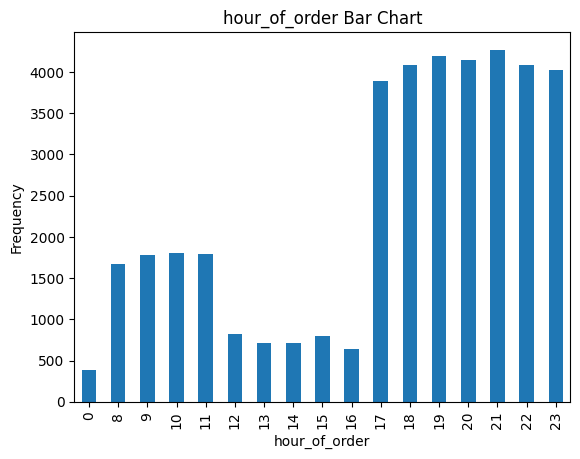

In [71]:
data['hour_of_order'] = data.Time_Orderd.apply(pd.Timestamp).dt.hour
data['hour_of_order'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('hour_of_order')
plt.ylabel('Frequency')
plt.title('hour_of_order Bar Chart')
plt.show()

<h2> Data Analysis

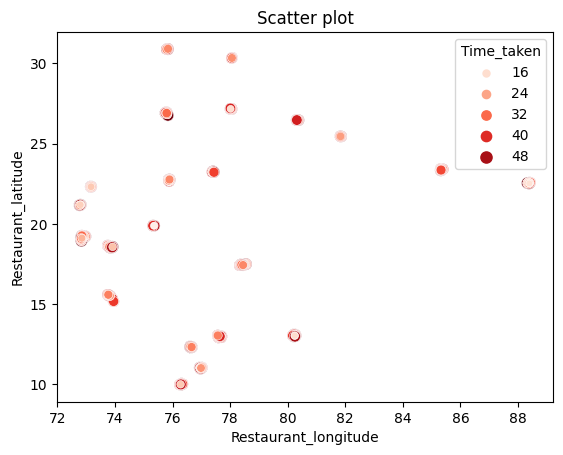

In [72]:
# create a scatter plot with a heat map
sns.scatterplot(x='Restaurant_longitude', y='Restaurant_latitude', data=data, hue='Time_taken', size = 'Time_taken', palette='Reds')
plt.title('Scatter plot')
# show the plot
plt.show()


#### Clustering the Restaurants Using *DBSCAN*

In [73]:
##https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
from sklearn.cluster import DBSCAN
kms_per_radian = 6371.0088
epsilon = 20 / kms_per_radian
coords = np.array(data[['Restaurant_latitude', 'Restaurant_longitude']])
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 23


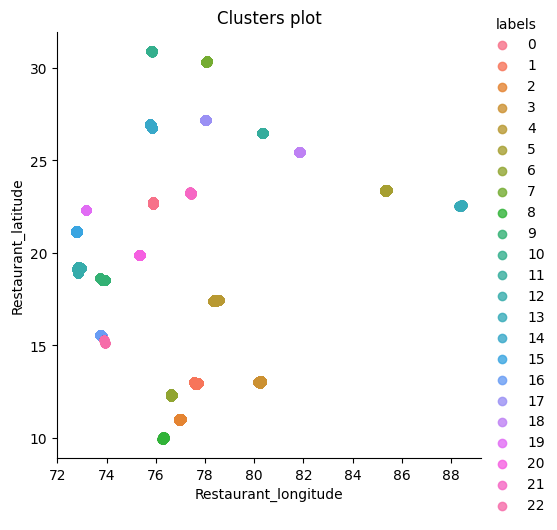

In [74]:
# create a scatter plot with a heat map
data['labels'] = cluster_labels
sns.lmplot(data=data, x='Restaurant_longitude', y='Restaurant_latitude', hue='labels', 
                   fit_reg=False, legend=True)
plt.title('Clusters plot')
# show the plot
plt.show()


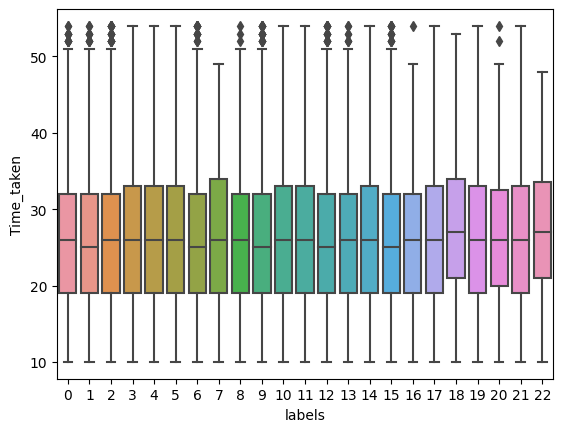

In [75]:
sns.boxplot(data = data , x = 'labels' , y = 'Time_taken', order = np.sort(data['labels'].unique()))
plt.show()

##### Obeservation - The restaurants are geographically clustered. But the time to deliver the order remains almost same accross the clusters.

In [76]:
continuous_variables = ['Delivery_person_Age','Delivery_person_Ratings','Distance','speed','Time_taken']

categorical_variables = ['Weatherconditions', 'Road_traffic_density','Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City','Day_of_order','hour_of_order']

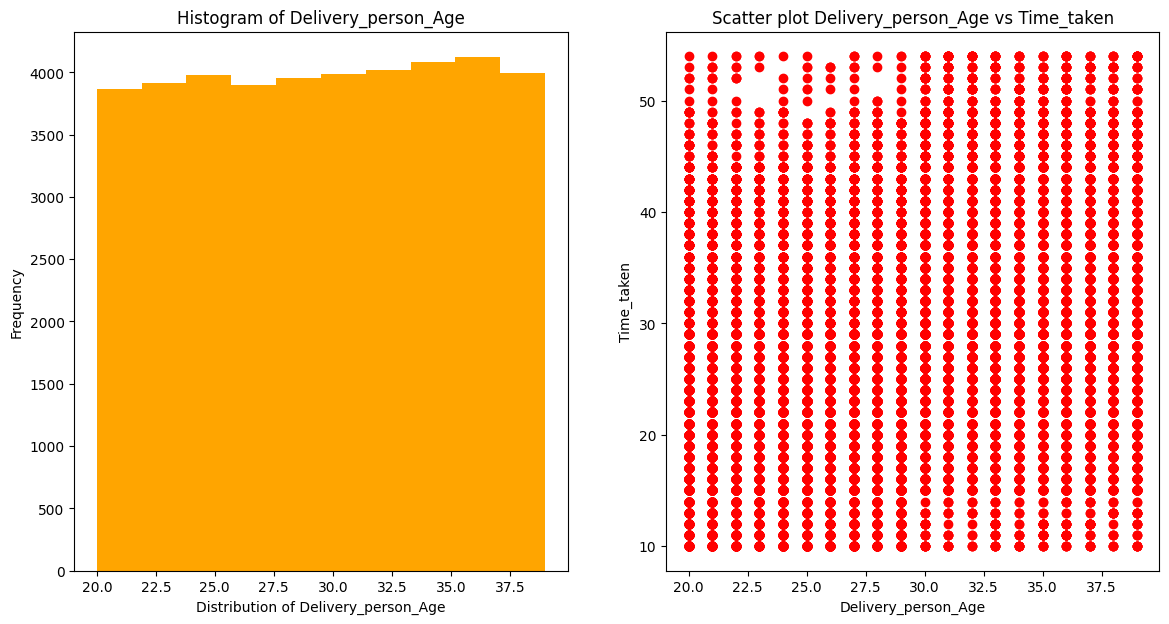

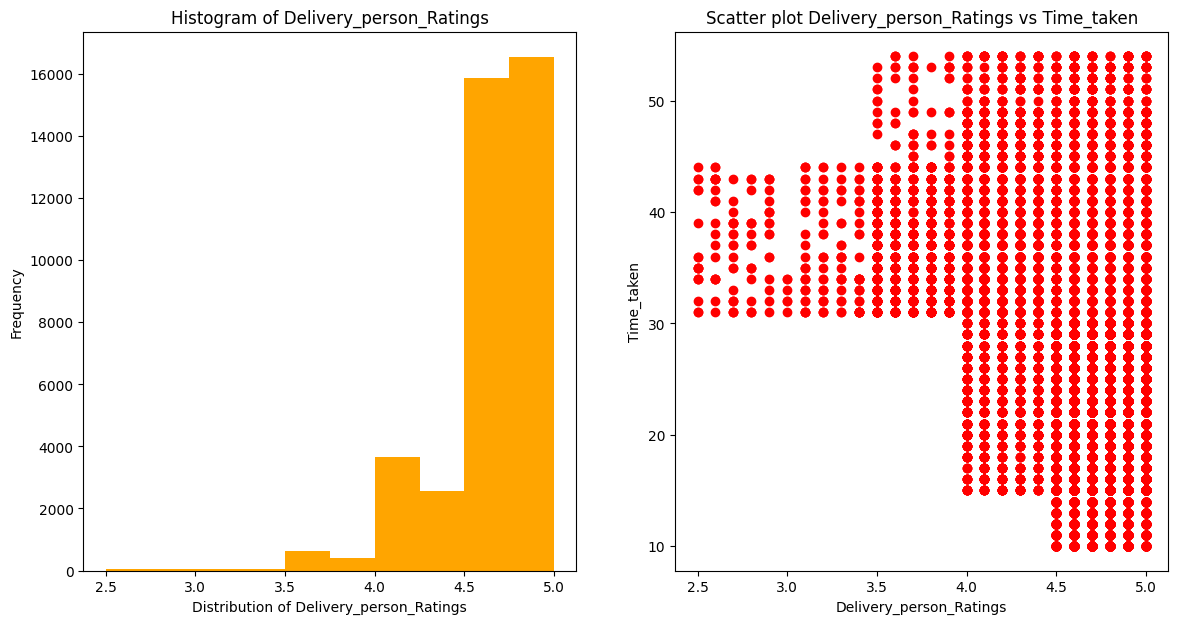

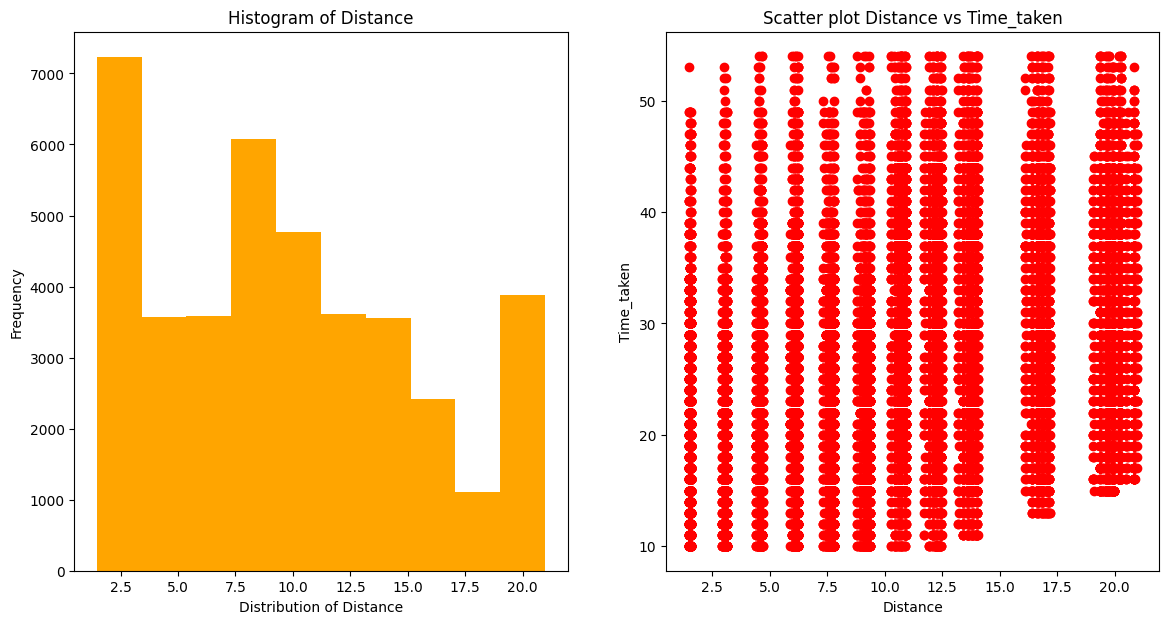

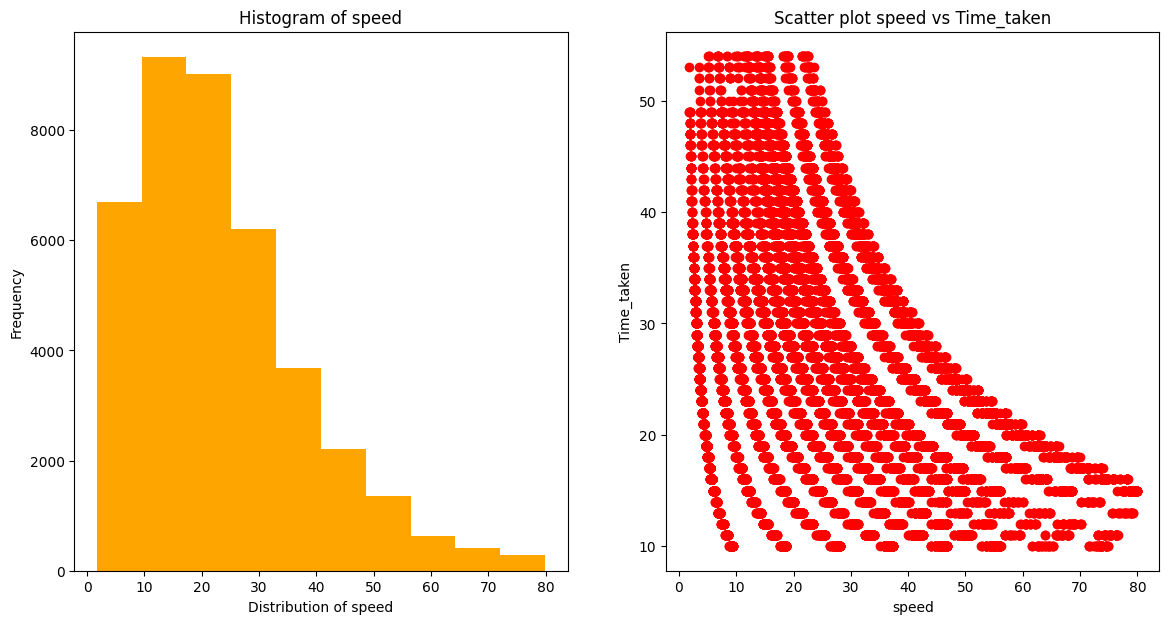

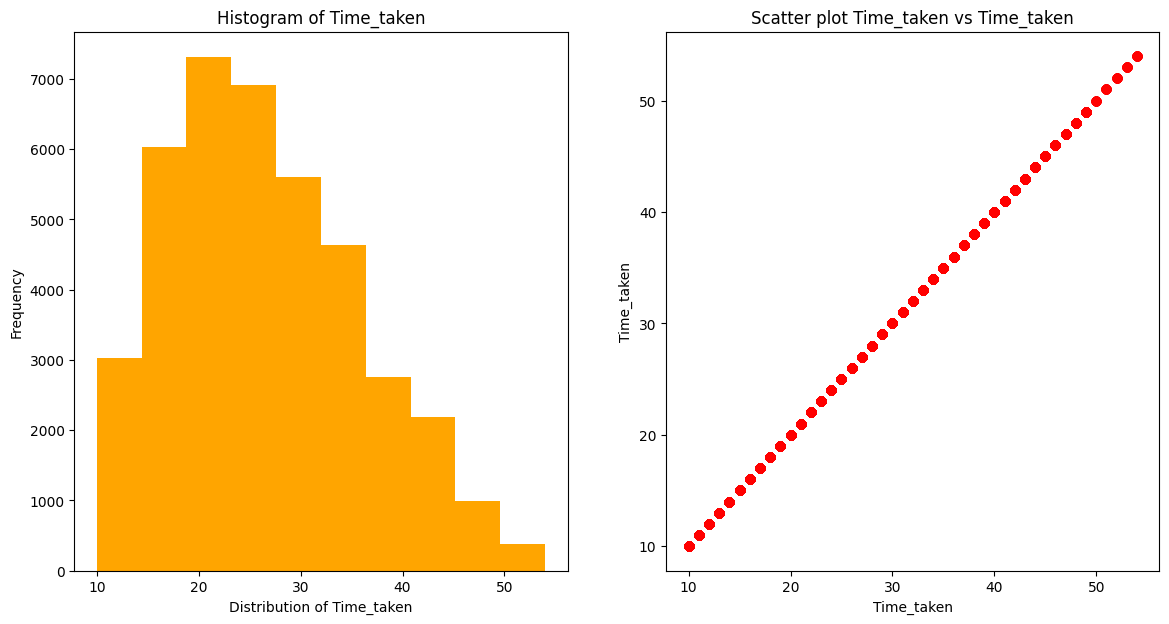

In [77]:
#Histogram of continous Variables
for i in continuous_variables:
  plt.figure(figsize=(14,7))
  plt.subplot(1, 2, 1)
  plt.hist(data[i],color = 'Orange')
  plt.xlabel('Distribution of {0}'.format(i))
  plt.ylabel('Frequency')
  plt.title("Histogram of {0}".format(i))
  plt.subplot(1, 2, 2)
  plt.scatter(x= data[i], y = data['Time_taken'], color ='red')
  plt.xlabel(i)
  plt.ylabel('Time_taken')
  plt.title('Scatter plot {0} vs Time_taken'.format(i))
  plt.show()

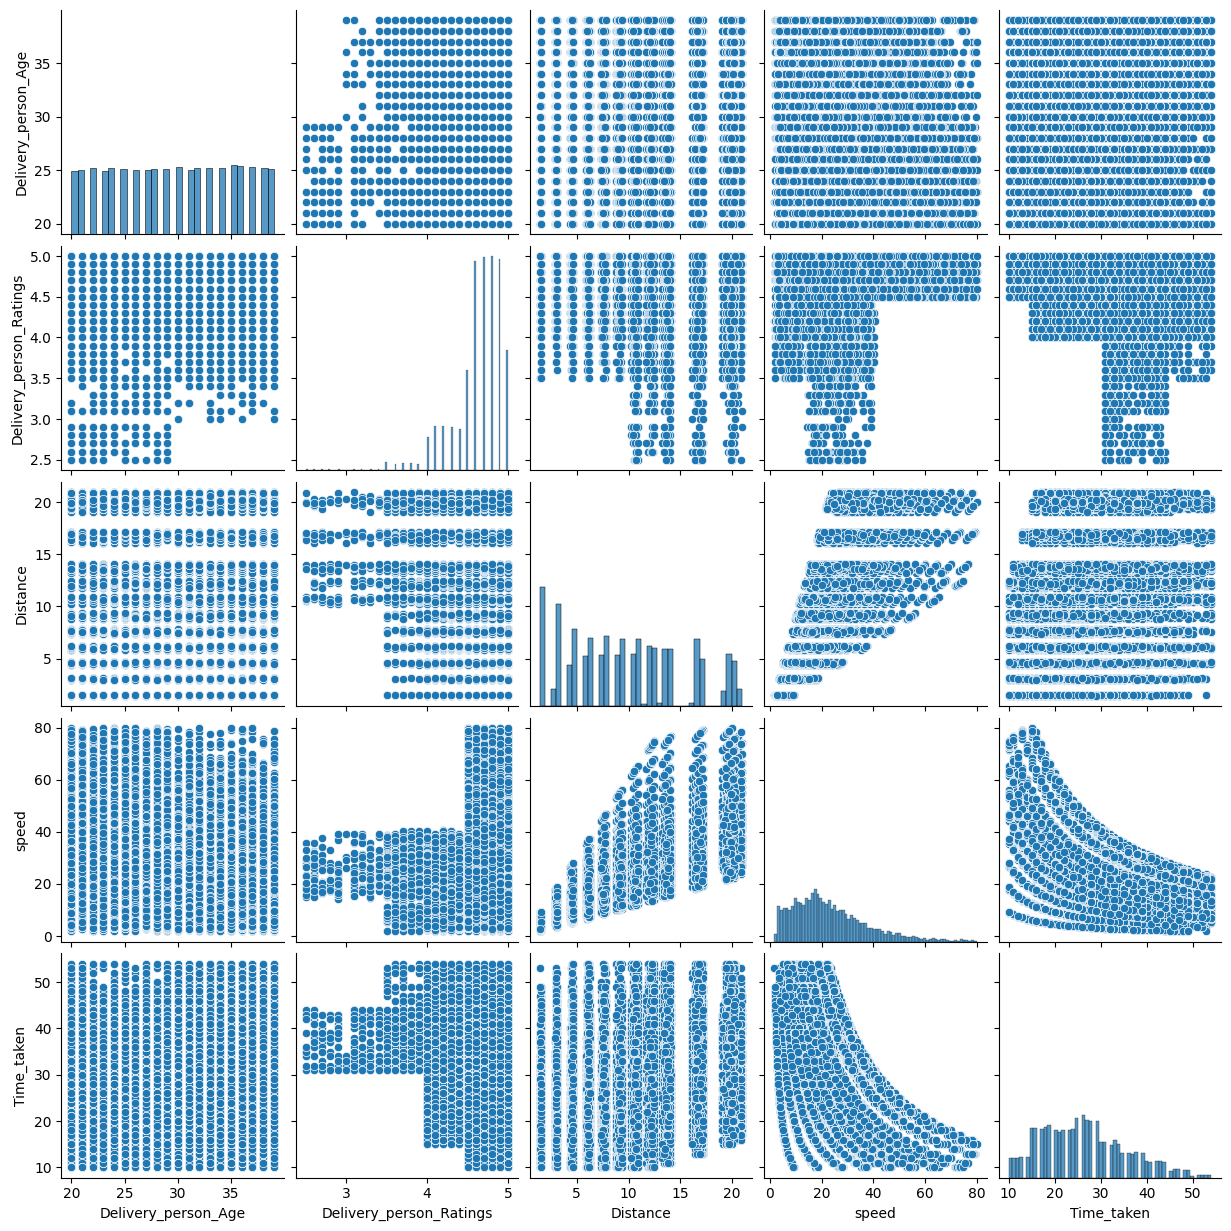

In [78]:
sns.pairplot(data[continuous_variables]) 

#####  
1.   Delivery person Age - There is an absence of notable disparity in the number of deliveries made by delivery personnel across distinct age cohorts. Additionally, the delivery time shows minimal variance across these age groups.
2.   Rating - Delivery personnel who received lower ratings were observed to take comparatively longer durations.
3.   Distance - The delivery time is more for longer distance orders

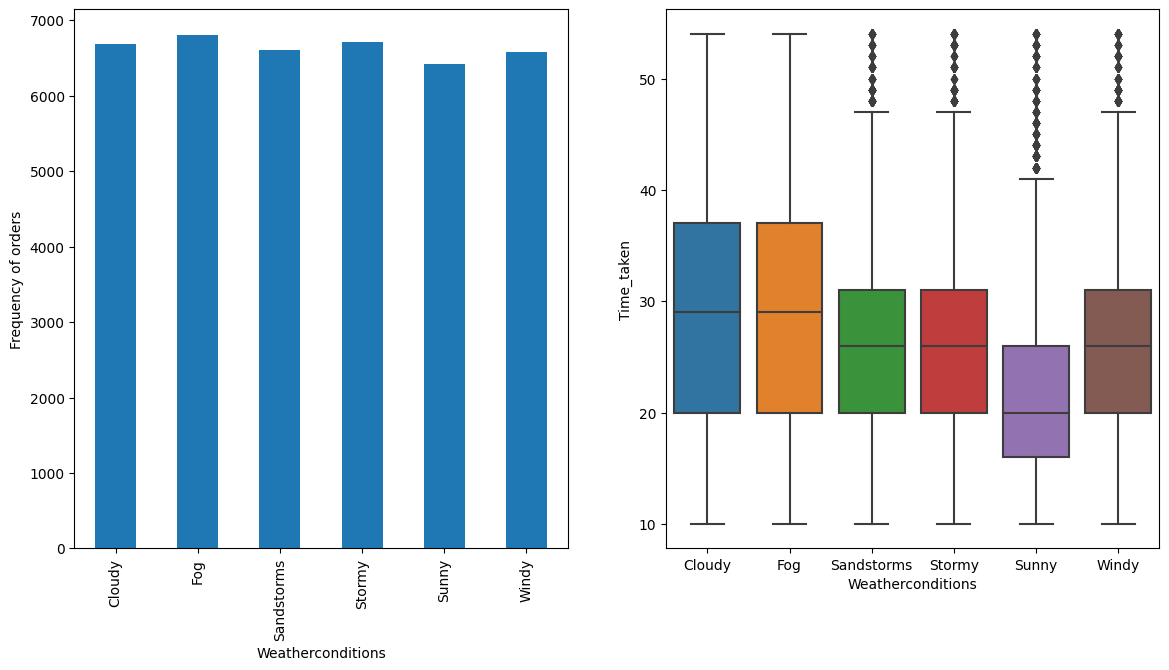

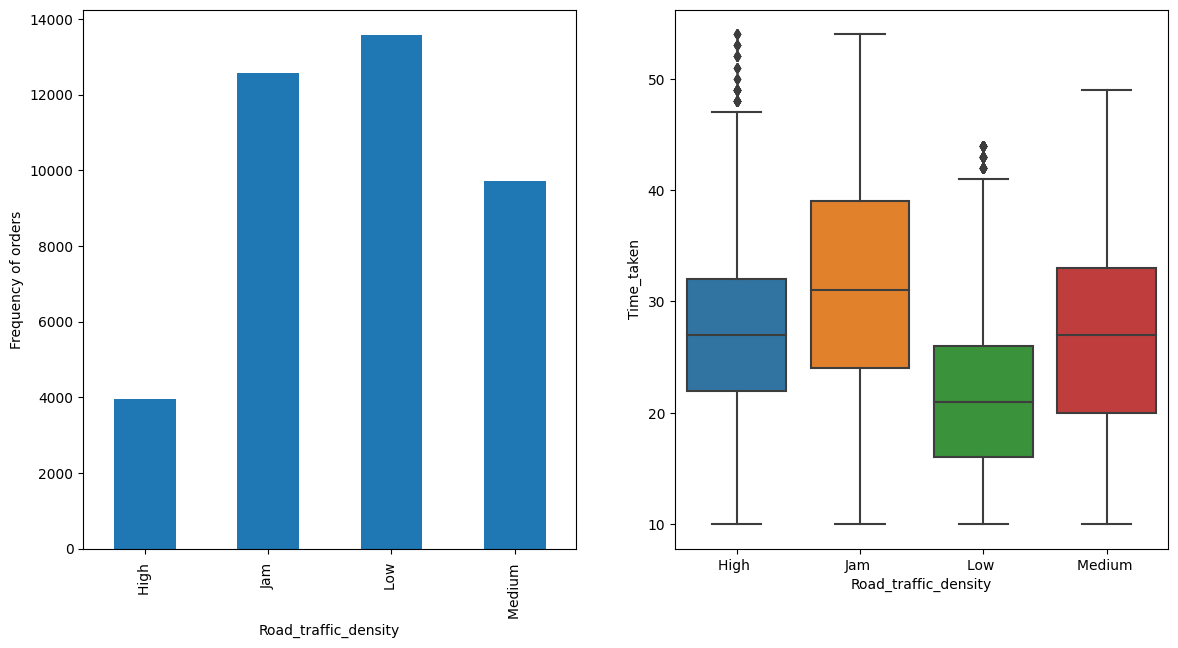

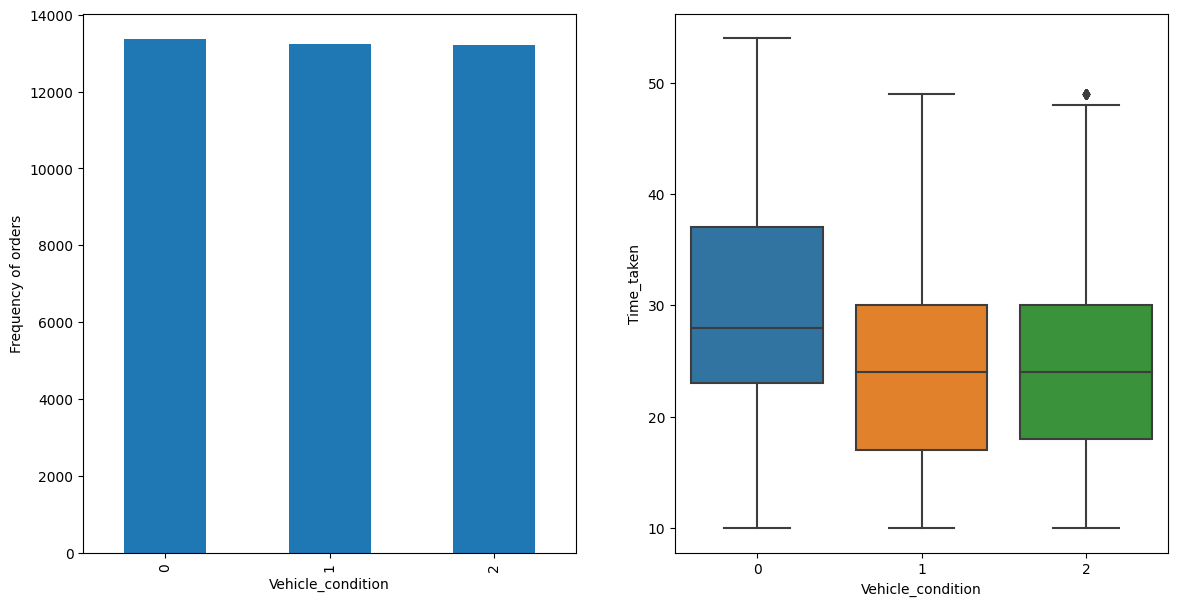

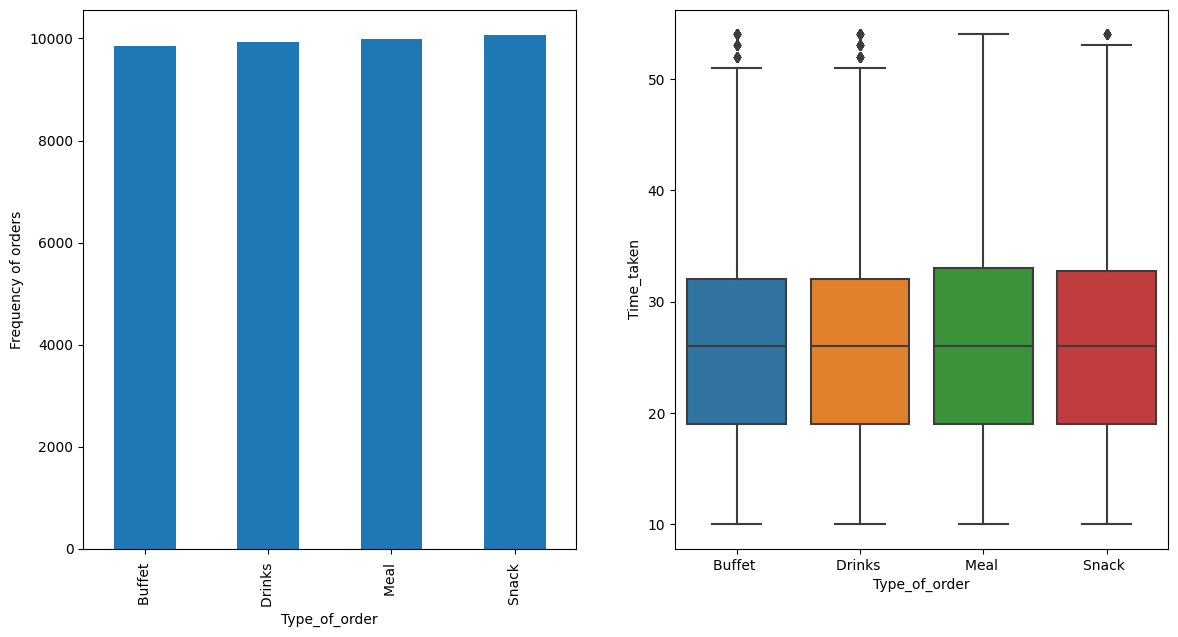

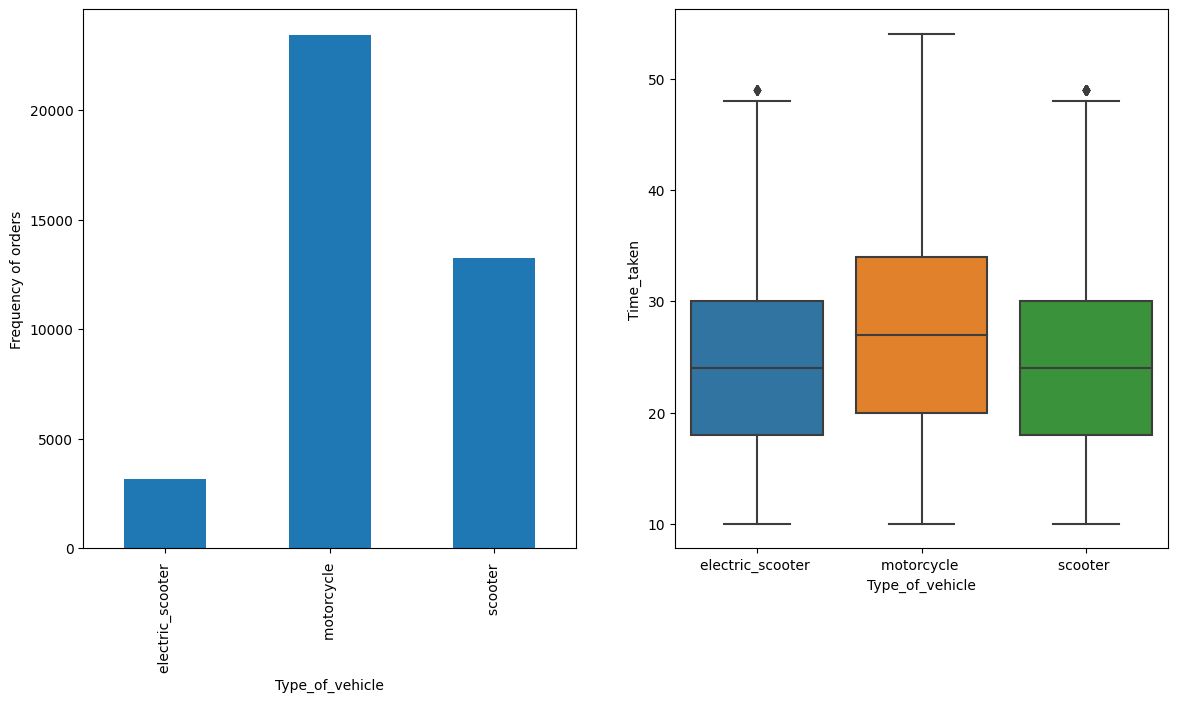

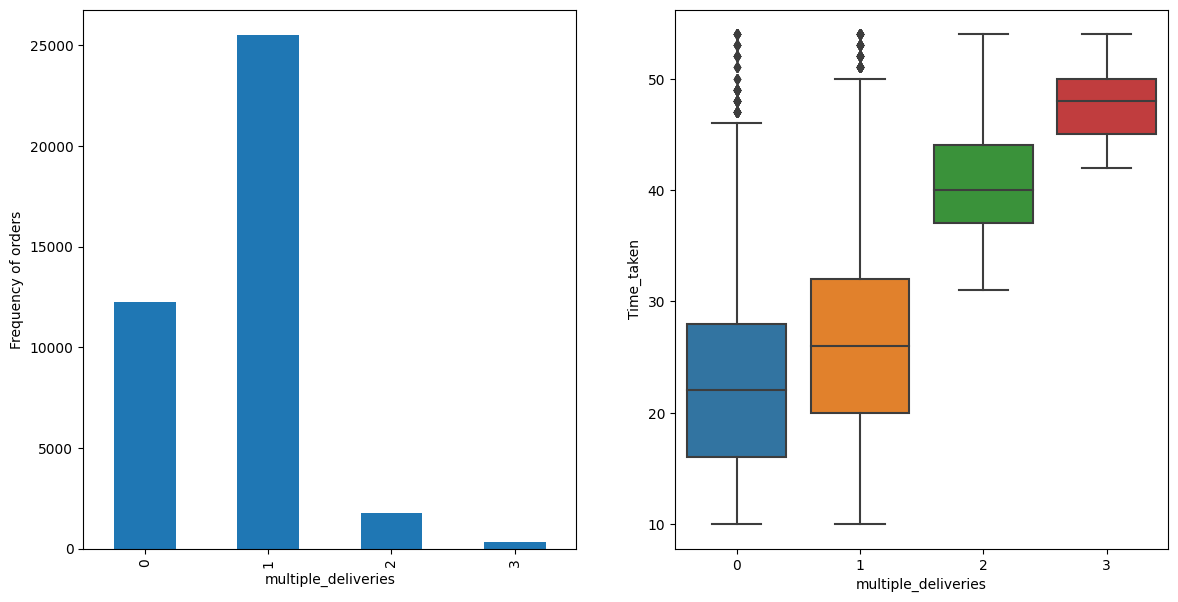

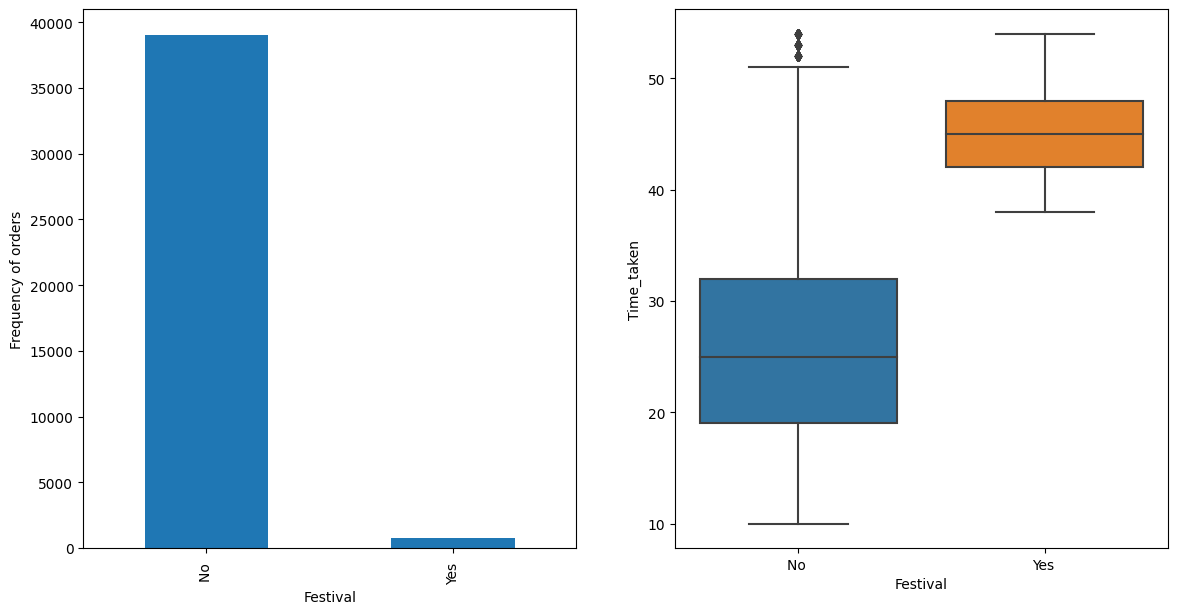

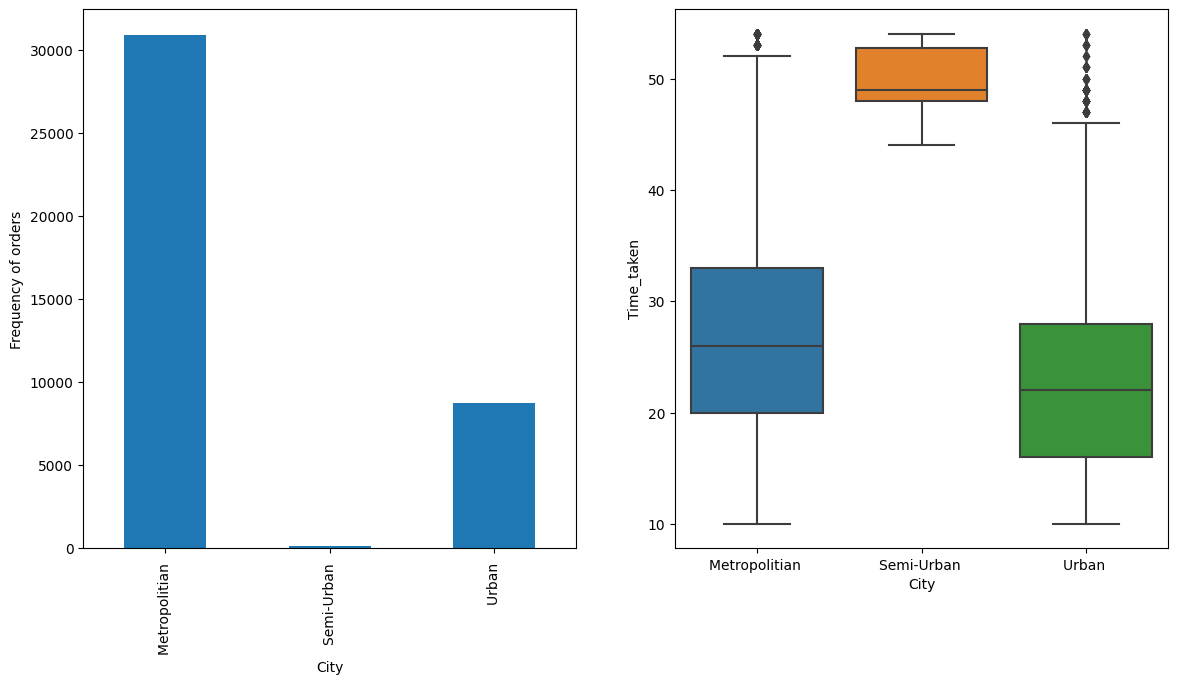

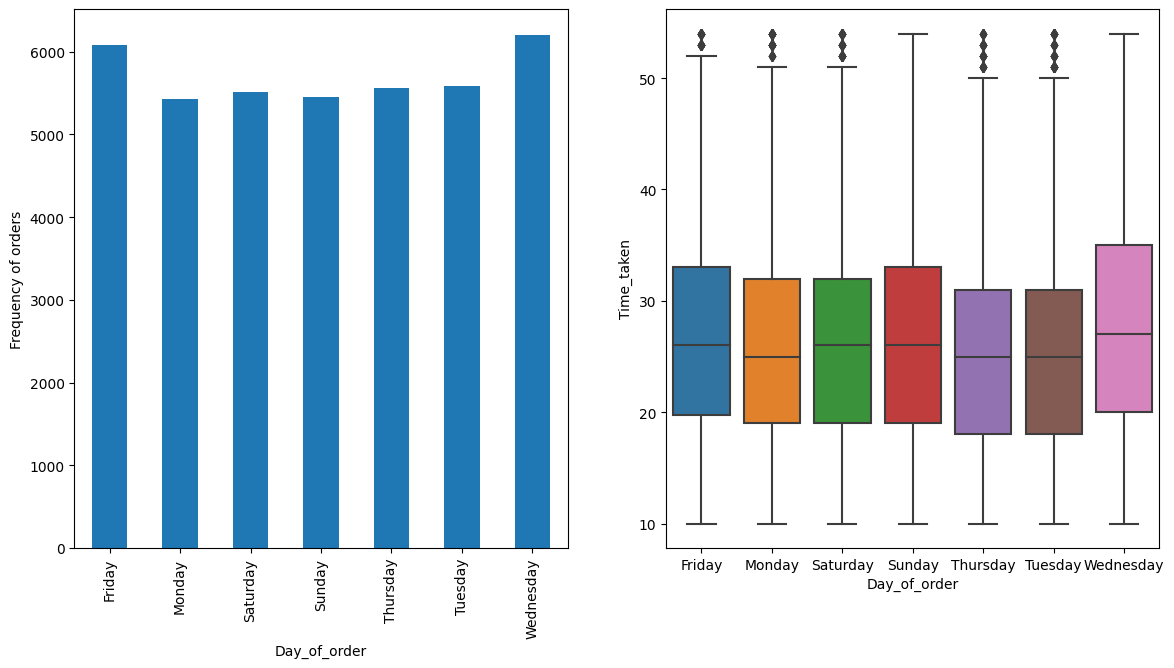

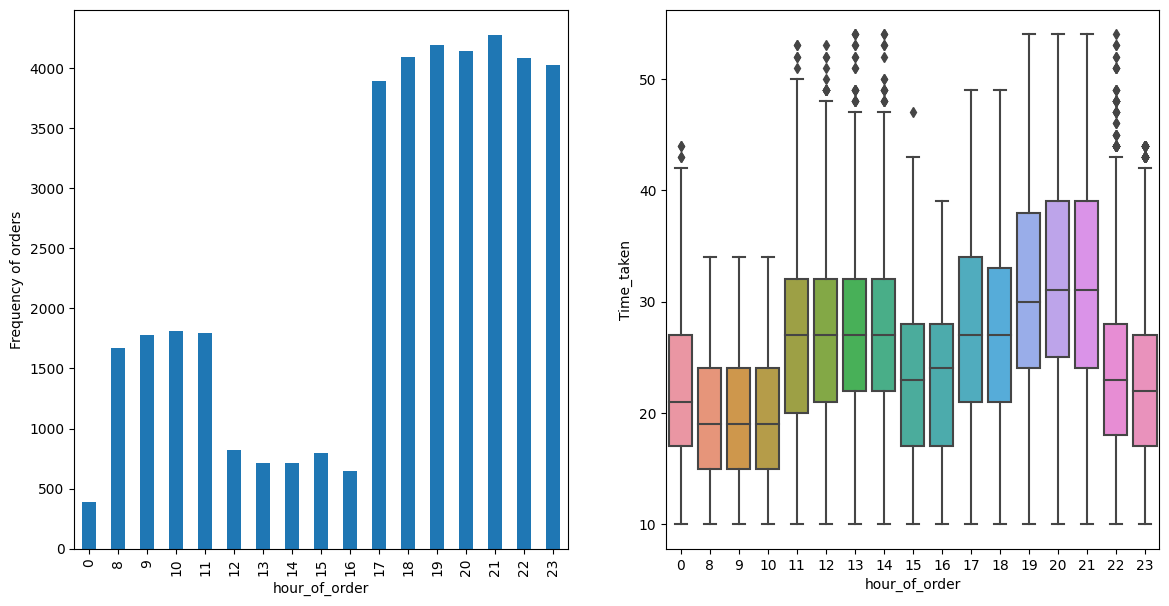

In [79]:
for i in categorical_variables:
  plt.figure(figsize=(14,7))
  plt.subplot(1, 2, 1)
  data[i].value_counts().sort_index().plot(kind='bar')
  plt.xlabel(i)
  plt.ylabel('Frequency of orders')
  plt.subplot(1, 2, 2)
  sns.boxplot(data = data , x = i , y = 'Time_taken', order = np.sort(data[i].unique()))
  plt.show()

##### Observations

1.   hour of order - Even with less orders during mid night and afternoon, the delivery time is more. During peak hours of evening and night, the delivery time is more. This is because of less availablity of delivery agents
2.   Day of order - All days of the week have frequent orders. And the distribution time to delivery is similar
3.   City - More number of orders in the metropolitian city and less from semi urban. But the delivery time is more for semi urban city compared to urban and metropolitian
4.   Festival - Festival days have less delivery and took more time to deliver
5. Multiple deliveries - More delivery more time it took to delivery the order
6. Type of Vehicle - The more frequent used mode of delivery is through the motor cycle. The ditribution of the motor cycle is much different from the rest.
7. Type of Order - No difference in delivery time for different order type
8. Vehcile condition - Vehichle with 0 category condition took more time for the delivery
9. Traffic condition - Low traffic have less delivery time. 
10. Weather Condition - Sunnay days have easy and less delivery time compared to other days



<Axes: >

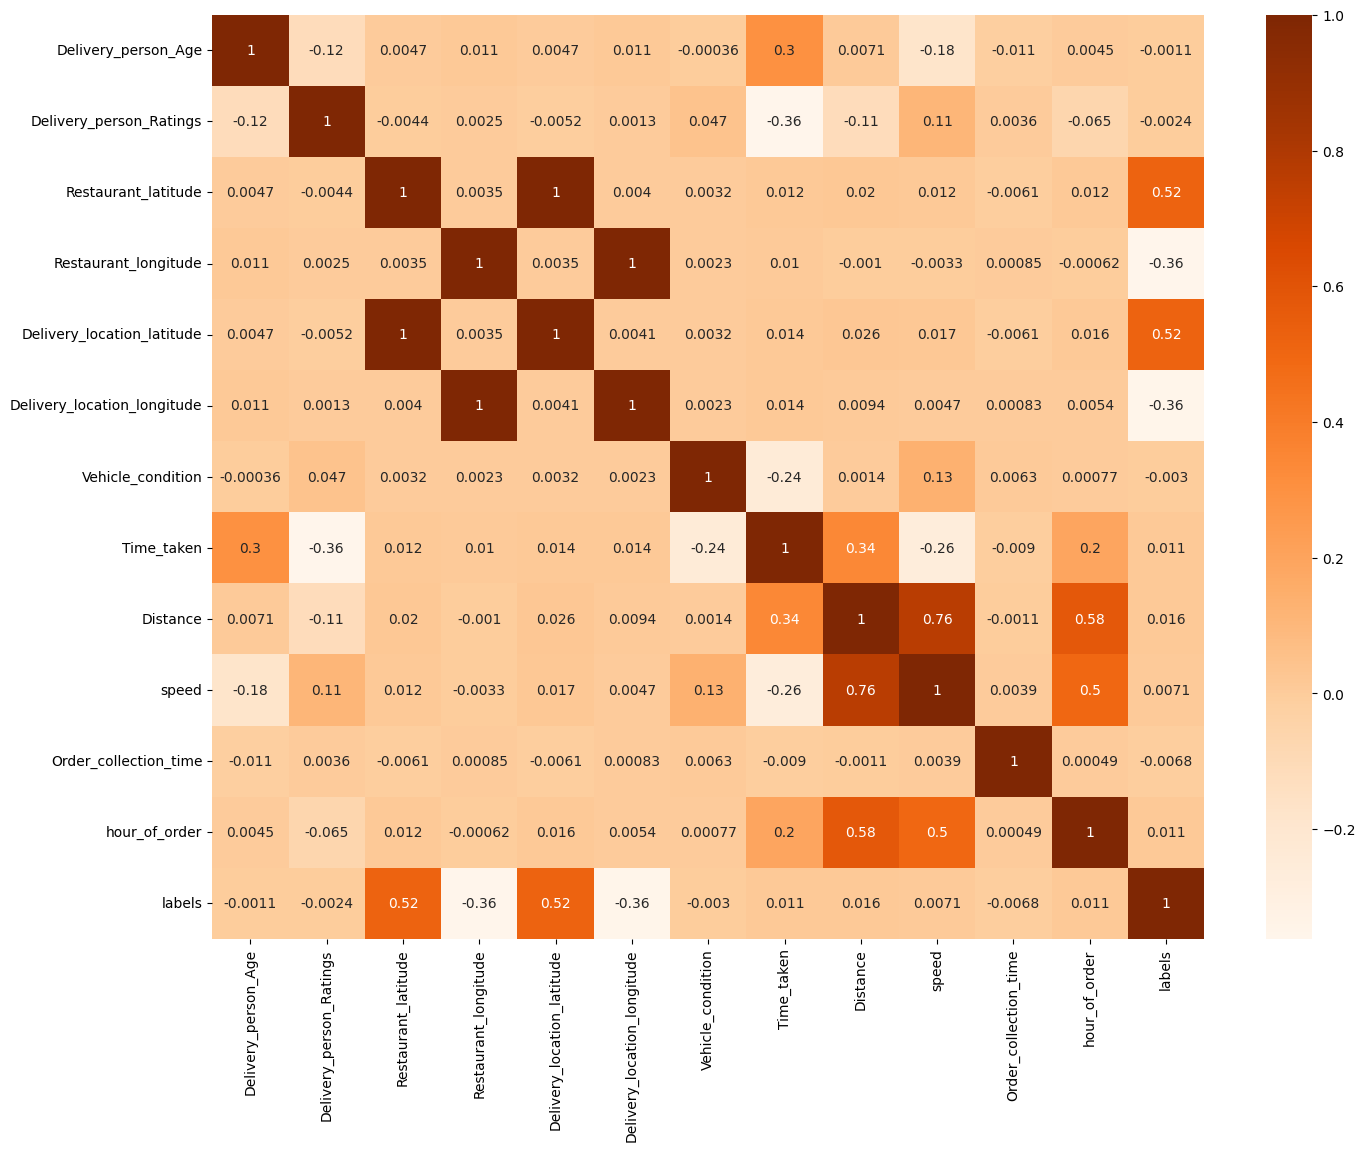

In [80]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='Oranges', annot = True)

##### Observations - Time taken to deliver the order have positive correlation with the distance, deliver person age and negative correlation with the delivery person age.



##### Conslusion - Out of the 25 original and derived features following features contibute to the predicting the delivery time.
1. Delivery_person_Age
2. Delivery_person_Ratings
3. Weatherconditions
4. Road_traffic_density
5. Vehicle_condition
6. Type_of_vehicle
7. multiple_deliveries
8. Festival
9. City
10. Distance
11. speed
12. hour_of_order
 
Can be considered for the predicting the delivery time. 

##### The clusters are perfectly grouped using the DBSCAN clustering.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39820 entries, 0 to 45592
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           39820 non-null  object        
 1   Delivery_person_ID           39820 non-null  object        
 2   Delivery_person_Age          39820 non-null  int64         
 3   Delivery_person_Ratings      39820 non-null  float64       
 4   Restaurant_latitude          39820 non-null  float64       
 5   Restaurant_longitude         39820 non-null  float64       
 6   Delivery_location_latitude   39820 non-null  float64       
 7   Delivery_location_longitude  39820 non-null  float64       
 8   Order_Date                   39820 non-null  datetime64[ns]
 9   Time_Orderd                  39820 non-null  object        
 10  Time_Order_picked            39820 non-null  object        
 11  Weatherconditions            39820 non-nu

In [82]:
data['Vehicle_condition'] = data['Vehicle_condition'].astype('str')
data['hour_of_order'] = data['hour_of_order'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39820 entries, 0 to 45592
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           39820 non-null  object        
 1   Delivery_person_ID           39820 non-null  object        
 2   Delivery_person_Age          39820 non-null  int64         
 3   Delivery_person_Ratings      39820 non-null  float64       
 4   Restaurant_latitude          39820 non-null  float64       
 5   Restaurant_longitude         39820 non-null  float64       
 6   Delivery_location_latitude   39820 non-null  float64       
 7   Delivery_location_longitude  39820 non-null  float64       
 8   Order_Date                   39820 non-null  datetime64[ns]
 9   Time_Orderd                  39820 non-null  object        
 10  Time_Order_picked            39820 non-null  object        
 11  Weatherconditions            39820 non-nu

#### Data Encoding


In [83]:
from sklearn.preprocessing import StandardScaler

#scaler object
scaler = StandardScaler()

# Fit and transform the data in column 'Delivery_person_Age'
data['Delivery_person_Age_scaled'] = scaler.fit_transform(data[['Delivery_person_Age']])

# Fit and transform the data in column 'Delivery_person_Ratings'
data['Delivery_person_Ratings_scaled'] = scaler.fit_transform(data[['Delivery_person_Ratings']])

# Fit and transform the data in column 'Distance'
data['Distance_scaled'] = scaler.fit_transform(data[['Distance']])

# Fit and transform the data in column 'Time_taken'
data['Time_taken_scaled'] = scaler.fit_transform(data[['Time_taken']])

In [84]:
X = data[['Delivery_person_Age_scaled',
          'Delivery_person_Ratings_scaled',
          'Weatherconditions', 
          'Road_traffic_density',
          'Vehicle_condition', 
          'Type_of_order', 
          'Type_of_vehicle',
          'multiple_deliveries', 
          'Festival', 
          'City', 
          'Distance_scaled',
          'hour_of_order']]
y = data['Time_taken_scaled']

In [85]:
X.head()

,Delivery_person_Age_scaled,Delivery_person_Ratings_scaled,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_scaled,hour_of_order
0,1.287257,0.845929,Sunny,High,2,Snack,motorcycle,0,No,Urban,-1.191006,11
1,0.766402,-0.421564,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,1.894052,19
2,-1.143401,-0.738437,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,-1.455741,8
3,1.460876,0.212183,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,-0.334219,18
4,0.419165,-0.104691,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,-0.618349,13


In [86]:
train = pd.get_dummies(X, drop_first = True)
print("The shape of the encoded dataframe",train.shape)

The shape of the encoded dataframe (39820, 40)


##### Random Splitting of the data

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

print("The shape of the train data set {0} and {1} ".format(X_train.shape,y_train.shape))

print("The shape of the test data set {0} and {1} ".format(X_test.shape,y_test.shape))

The shape of the train data set (26679, 40) and (26679,) 
The shape of the test data set (13141, 40) and (13141,) 


#### Linear Regression

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a SGDRegressor object
sgd = SGDRegressor()

# Define the hyperparameters to tune
parameters = {'alpha': [0.0001, 0.001, 0.01],
              'penalty' : ['l2', 'l1', 'elasticnet']}

# Create a GridSearchCV object
grid = GridSearchCV(sgd, parameters, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'alpha': 0.0001, 'penalty': 'elasticnet'}
Best score:  0.6141988784176668


In [89]:
test = []
train = []
# Make predictions on the test set using the best model
best_sgd = grid.best_estimator_
y_pred_train = best_sgd.predict(X_train)
y_pred = best_sgd.predict(X_test)

# Evaluate the performance of the model

mse_train = mean_squared_error(y_train, y_pred_train)
train.append(mse_train)
print("Mean squared error train: ", mse_train)

test.append(mse_train)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error test: ", mse)

Mean squared error train:  0.38390050064210346
Mean squared error test:  0.37905974781689544


#### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Define parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]}

# Define grid search cross-validation
grid_search = GridSearchCV(dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search cross-validation on data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_

# Print best parameters and best score
print("Best parameters:", best_params)

Best parameters: {'max_depth': 9, 'min_samples_split': 10}


In [91]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)

# Calculate the mean squared error of the best model
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean squared error of the best model:", mse_train)
train.append(mse_train)

y_pred = best_model.predict(X_test)

# Calculate the mean squared error of the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of the best model:", mse)
test.append(mse)

Mean squared error of the best model: 0.24022941960560565
Mean squared error of the best model: 0.2555560573651248


#### Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Define the random forest model
rf_model = RandomForestRegressor()

# Define the hyperparameters to tune
params = {"n_estimators": [50, 100, 200],
          "max_depth": [3, 5, 10]}

# Define the GridSearchCV object
grid_search = GridSearchCV(rf_model, params, cv=5, scoring="neg_mean_squared_error")

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean squared error:", abs(grid_search.best_score_))


Best hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best mean squared error: 0.21367908588334233


In [93]:
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)

# Calculate the mean squared error of the best model
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean squared error of the best model:", mse_train)
train.append(mse_train)

y_pred = best_model.predict(X_test)

# Calculate the mean squared error of the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of the best model:", mse)
test.append(mse)

Mean squared error of the best model: 0.19152202938923107
Mean squared error of the best model: 0.21153770513693204


In [94]:
train

[0.38390050064210346, 0.24022941960560565, 0.19152202938923107]

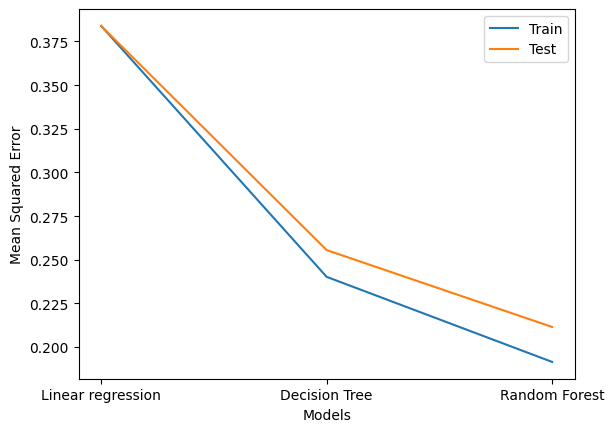

In [96]:
plt.plot(['Linear regression','Decision Tree','Random Forest'],train, label='Train')
plt.plot(['Linear regression','Decision Tree','Random Forest'],test, label='Test')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

#### Observations - The Random forest model MSE is less compared to other models.